# Example Usage

Here we will load a small (synthetic) waterflood's production and injection data, then perform _CRM_ to estimate the connectivities, predict production, and compare the predictions to historical production

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaterflood import CRM

## Waterflood history matching

First, we pull production from 4 wells and injection from 5 wells over a 298 timestep period, then we create a CRM instance where the time constants are for injector-producer pairs (per-pair) and connectivity constants are limited to 1 for each injector-producer pair. Next, we fit and predict historical production.

In [2]:
gh_url = "https://raw.githubusercontent.com/frank1010111/pywaterflood/master/testing/data/"
prod = pd.read_csv(gh_url + "production.csv", header=None)
inj = pd.read_csv(gh_url + "injection.csv", header=None)
time = pd.read_csv(gh_url + "time.csv", header=None)

crm = CRM(tau_selection="per-pair", constraints="up-to one")
crm.fit(prod.values, inj.values, time.values[:, 0])
q_hat = crm.predict()

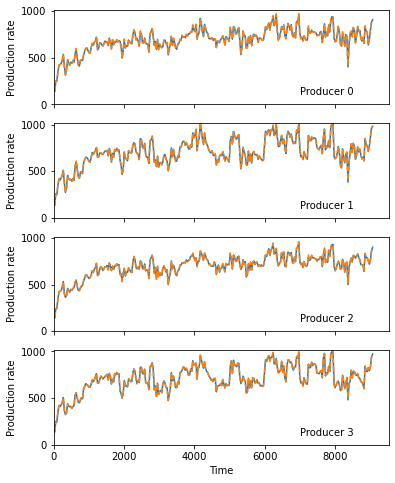

In [3]:
fig, axes = plt.subplots(len(prod.columns), figsize=(6, 8), sharex=True, sharey=True)
for i, p in enumerate(prod):
    axes[i].plot(time, prod[p], label="Production")
    axes[i].plot(time, q_hat[:, i], ls="--", label="Prediction")
    axes[i].set(xlim=(0, None), ylim=(0, None), ylabel="Production rate")
    axes[i].annotate(f"Producer {p}", xy=(7000, 100))
axes[i].set(xlabel="Time");

## Look at inter-well connectivity

Let's make a table of the connectivity and highlight the most important injector for each producer.

In [19]:
connectivity = pd.DataFrame(
    crm.gains,
    index=prod.columns.rename("Producer"),
    columns=inj.columns.rename("Injector"),
)
connectivity.T.style.highlight_max().format("{:.2}")

Producer,0,1,2,3
Injector,,,,
0,0.32,0.33,0.18,0.17
1,0.33,0.16,0.33,0.17
2,0.25,0.25,0.25,0.25
3,0.17,0.33,0.17,0.33
4,0.18,0.17,0.33,0.33
